In [1]:
import sys
sys.path.insert(0,'../src/')
from curve import *
from utils import *
from multiply_connected_pipe import *
import pickle
from matplotlib import pyplot as plt

In [2]:
with open('global_pipe.pickle','rb') as f:
    pipe = pickle.load(f)

required_tol = 1e-10

In [3]:
import numpy as np

In [4]:
pipe.n_boundaries

8

In [5]:
pipe.build_geometry(required_tol,n_jobs=8)
len(pipe.t)

		refining boundary 0 out of 8
		refining boundary 1 out of 8
		refining boundary 2 out of 8
		refining boundary 3 out of 8
		refining boundary 4 out of 8
		refining boundary 5 out of 8
		refining boundary 6 out of 8
		refining boundary 7 out of 8


133824

In [6]:
pipe.build_A(fmm=True)

In [7]:
pipe.build_omegas(restart=4000,max_iter=1)

	residual = 0.1378331609975026,	iter = 100,	time = 1.0 mins
	residual = 0.08714812140579481,	iter = 200,	time = 2.0 mins
	residual = 0.08106006122173441,	iter = 300,	time = 3.0 mins
	residual = 0.07738773733489311,	iter = 400,	time = 4.0 mins
	residual = 0.07592991783593327,	iter = 500,	time = 5.0 mins
	residual = 0.07208530239822819,	iter = 600,	time = 5.0 mins
	residual = 0.06536003537477536,	iter = 700,	time = 7.0 mins
	residual = 0.06070969469482702,	iter = 800,	time = 8.0 mins
	residual = 0.05868328492811896,	iter = 900,	time = 9.0 mins
	residual = 0.0448043802259691,	iter = 1000,	time = 10.0 mins
	residual = 0.022126874586111817,	iter = 1100,	time = 11.0 mins
	residual = 0.018848000901351296,	iter = 1200,	time = 12.0 mins
	residual = 0.010886558770078547,	iter = 1300,	time = 13.0 mins
	residual = 0.0031884469006703614,	iter = 1400,	time = 14.0 mins
	residual = 0.0008987982883956255,	iter = 1500,	time = 15.0 mins
	residual = 2.8273051511329272e-05,	iter = 1600,	time = 16.0 mins
	r

In [8]:
np.real(np.sum(pipe.omegas[0]*np.conjugate(pipe.dt)))

1.6228796084760688e-10

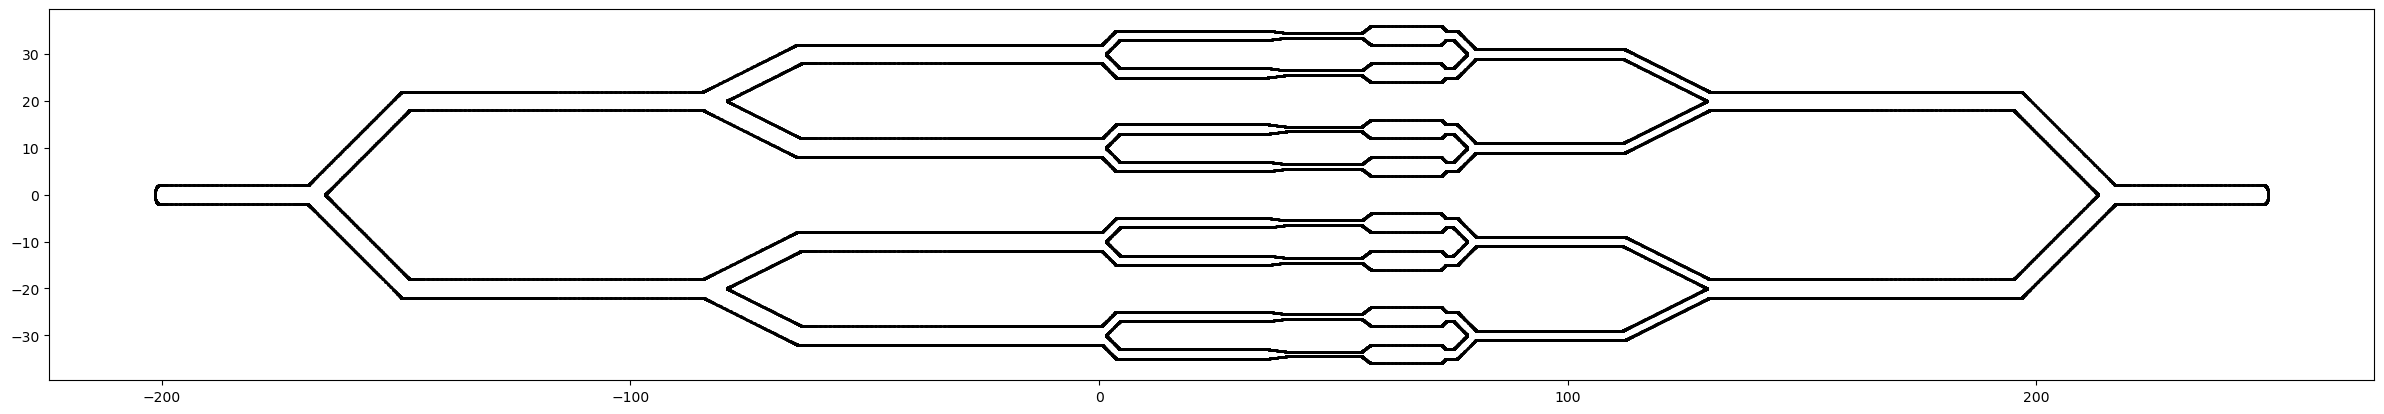

In [9]:
fig, ax = plt.subplots(figsize=(30,10))
ax.set_aspect('equal')
ax.set_facecolor('white')

ax.scatter(pipe.t.real,pipe.t.imag,s=.5,c='k')

Text(0.5, 0.98, 'gmres convergence plot, my python version, without restart, with nullspace removed')

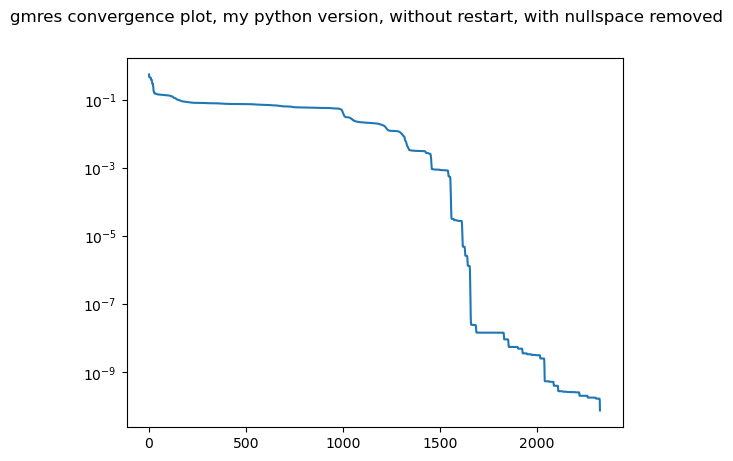

In [10]:
fig, ax = plt.subplots()
ax.set_facecolor('white')
ax.semilogy(pipe.callbacks[-1].residuals)
fig.suptitle('gmres convergence plot, my python version, without restart, with nullspace removed')

In [11]:
with open("./global_built.pickle","wb") as f:
    pickle.dump(pipe,f)